Como comunicado tive que enviar novamente o link da atividade, pois enviei o link errado

Classificação de um dataset através de SVM, dataset utilizado é referente a informações sobre clientes de um banco, serão utilizadas tais infotmações para poder identificar se o cliente terá cartão de crédito

In [ ]:
#Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importando a base de dados
dataset = pd.read_csv("https://raw.githubusercontent.com/joaolcamelo/IA/main/UniversalBank.csv")
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#selecionando os atributos a serem utilizados para treinamento de teste
X = dataset.iloc[:,[1,3]].values  
y = dataset.iloc[:,13].values

print(X[0:6,:])

[[ 25  49]
 [ 45  34]
 [ 39  11]
 [ 35 100]
 [ 35  45]
 [ 37  29]]


Dividindo a base de dados entre treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Normalizando os dados


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

**Treinando**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Avaliando o modelo


In [ ]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print("")
print(y_pred[0:35])
print("y_test: ",type(y_test))
print("y_pred: ",type(y_pred))

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test:  <class 'numpy.ndarray'>
y_pred:  <class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )

Acurácia:  70.08 %


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)

Matrix de confusão: 
[[876   0]
 [374   0]]


Visualizando os resultados

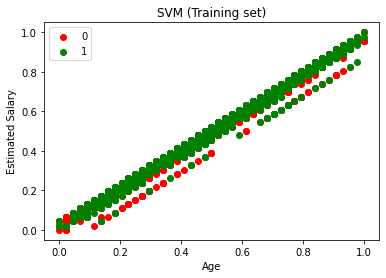

In [ ]:
X_set, y_set = X_train, y_train
# Pontos vermelhos e verdes 
plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], color = 'red',  label = 0)
plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], color = 'green', label = 1)

plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Foi encontrado um questionamento ao utilizar outro banco de dados, apareceu um erro (ValueError: Unknown label type: 'continuous'), consegui encontrar 2 possíveis soluções: "solução" o questionamento foi: 

*   Ao atribuir o ".fit" na variável "classifier" definir as variaveis de X_train e y_train como int
*   No lugar de importar SVC, importar SVR
---
O dataset que apresentou esse erro foi: "https://raw.githubusercontent.com/joaolcamelo/IA/main/SHARADAR-Stock.csv"


Professor, como conversado com vc eu tentei procurar alguma forma de retirar esse "bug" de sempre colocar um array com 0 ou com 1 dependendo da variavel selecionada como "y", porem n encontrei uma forma de corrigir isso, mesmo normalizando os dados, logo achei melhor por enviar assim, caso deseje eu posso colocar outro dataset que satistaça o SVM de forma melhor